In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("customer_segmentation_real.csv")
df.drop(["CustomerID"],axis=1,inplace=True)
df

,Age,Annual_Income,SpendingScore,Online_Time(hrs/week),Purchases_per_Month
0,56,23343,81,46,15
1,69,33500,5,43,29
2,46,73222,29,16,29
3,32,49375,4,4,11
4,60,29662,10,37,32
...,...,...,...,...,...
495,65,139803,35,17,21
496,42,90173,96,35,8
497,57,90390,88,13,38
498,62,72329,78,41,8


In [5]:
x = df
x

,Age,Annual_Income,SpendingScore,Online_Time(hrs/week),Purchases_per_Month
0,56,23343,81,46,15
1,69,33500,5,43,29
2,46,73222,29,16,29
3,32,49375,4,4,11
4,60,29662,10,37,32
...,...,...,...,...,...
495,65,139803,35,17,21
496,42,90173,96,35,8
497,57,90390,88,13,38
498,62,72329,78,41,8


In [6]:
scalar = StandardScaler()
scalar_data = scalar.fit_transform(x)
scalar_data

array([[ 0.78423339, -1.60481921,  1.13143949,  1.44268121, -0.42400072],
       [ 1.6496862 , -1.32607195, -1.50546334,  1.22671096,  0.81576747],
       [ 0.11850046, -0.23594703, -0.67275718, -0.7170212 ,  0.81576747],
       ...,
       [ 0.85080668,  0.23520912,  1.37431212, -0.93299144,  1.61276131],
       [ 1.18367315, -0.2604544 ,  1.02735122,  1.0827308 , -1.04388482],
       [-1.74555174,  1.66305815, -0.56866891,  0.93875064, -1.48665918]],
      shape=(500, 5))

In [7]:
model = KMeans(n_clusters=3,random_state=22)
model.fit(scalar_data)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,22
,copy_x,True
,algorithm,'lloyd'


In [8]:
label = model.labels_
label

array([1, 0, 1, 1, 0, 1, 2, 2, 0, 2, 2, 2, 1, 0, 1, 2, 2, 0, 2, 1, 1, 1,
       2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2,
       0, 2, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 0, 1, 1, 1, 1, 2, 0, 2, 1,
       2, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0, 2, 2, 2, 2, 2, 2, 0, 1, 2, 0, 0,
       2, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 1, 0, 1, 0, 1,
       2, 1, 1, 2, 2, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 1, 1, 1, 0, 2,
       2, 2, 0, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 1, 1, 1, 0, 0, 0, 1,
       2, 1, 0, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2, 1, 1, 0, 2,
       0, 1, 0, 2, 2, 2, 0, 1, 1, 0, 2, 2, 0, 0, 2, 1, 1, 0, 2, 1, 2, 1,
       1, 0, 0, 1, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 2,
       2, 0, 0, 1, 2, 0, 0, 0, 1, 1, 0, 2, 0, 1, 0, 0, 2, 0, 2, 0, 1, 0,
       0, 2, 0, 0, 2, 1, 2, 1, 1, 1, 1, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 1,
       1, 2, 2, 2, 2, 1, 1, 2, 0, 1, 1, 0, 2, 1, 2,

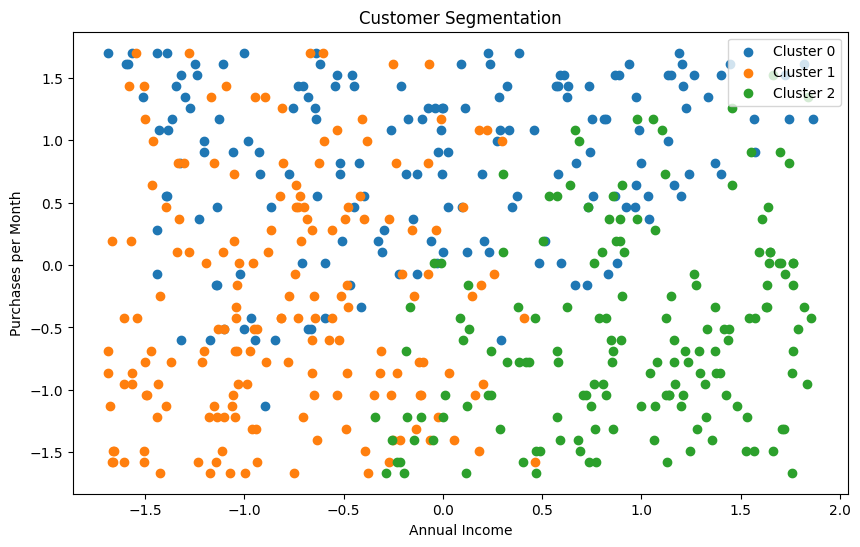

In [10]:
plt.figure(figsize=(10,6))
for i in np.unique(label):
    plt.scatter(scalar_data[label==i,1],scalar_data[label==i,4],label=f'Cluster {i}')
plt.legend()
plt.xlabel("Annual Income")
plt.ylabel("Purchases per Month")
plt.title("Customer Segmentation")
plt.show()